In [52]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [2]:
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/rc_bigsleep.txt').read()

In [5]:
sleep[0:50]

"It was about eleven o'clock in the morning, mid Oc"

In [6]:
sleep = sleep.decode('utf-8')

In [7]:
sleep = sleep.lower()

In [8]:
sleep[0:50]

u"it was about eleven o'clock in the morning, mid oc"

In [9]:
tokenizer = RegexpTokenizer(r'\w+')

In [10]:
sleepwordsorig = tokenizer.tokenize(sleep)

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

In [14]:
sleepstop = [w for w in sleepwordsorig if not w in stop]

In [16]:
print len(sleepstop)/float(len(sleepwordsorig))

0.460562129747


In [17]:
print 'proportional number of stopwords pages:', 277*31642/68703

proportional number of stopwords pages: 127


In [58]:
sent = pd.read_pickle('sentiment.pkl')

In [59]:
#sent.fillna(0, inplace=True)

In [60]:
#sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

In [61]:
#sent['word'] = sent['word'].values.astype('unicode')

In [62]:
#sent.to_pickle('sentiment.pkl')

In [22]:
sleepwords = pd.DataFrame(columns=['word'])

In [23]:
sleepwords.word = sleepstop

In [24]:
sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

In [25]:
sleepsentiment['index'] = sleepsentiment.index

In [26]:
sleepsentiment.head()

,word,emotion,sentiment,index
0,eleven,NaN,NaN,0
1,clock,anticipation,0.0,1
2,morning,NaN,NaN,2
3,mid,0,0.0,3
4,october,NaN,NaN,4


In [27]:
len(sleepstop)/127.0

249.1496062992126

In [28]:
import numpy as np

In [29]:
sleepsentiment.fillna(0,inplace=True)

In [30]:
sample = sleepsentiment[0:1000]

In [31]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [32]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append(sum(i.sentiment))

In [33]:
len(pagesent)

211

<Container object of 211 artists>

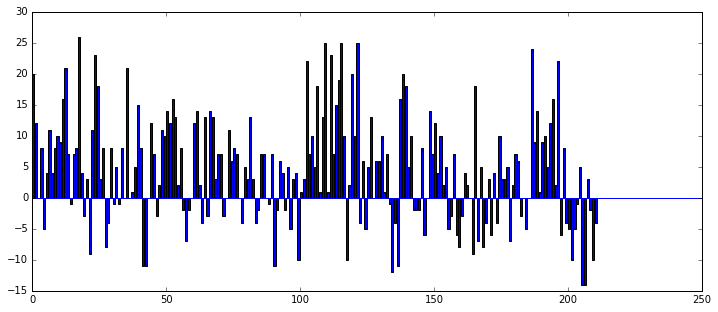

In [34]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pagesent)),pagesent)

In [35]:
words = word_tokenize(sleep)

In [36]:
sentences = sent_tokenize(sleep)

In [37]:
print len(sentences), len(words), len(words)/float(len(sentences))

6591 81341 12.3412228797


In [38]:
ss = sleepsentiment.sentiment.values

In [39]:
from collections import Counter

In [40]:
Counter(ss)

Counter({-1.0: 3828, 0.0: 23048, 1.0: 4766})

In [41]:
pospage = []
negpage = []

for i in chunker(sleepsentiment,150):
    postemp = 0
    negtemp = 0
    for j in i.sentiment.values:
        if j == 1.0:
            postemp += 1
        elif j == -1.0:
            negtemp -= 1
    pospage.append(postemp)
    negpage.append(negtemp)

In [42]:
len(pospage)

211

<Container object of 211 artists>

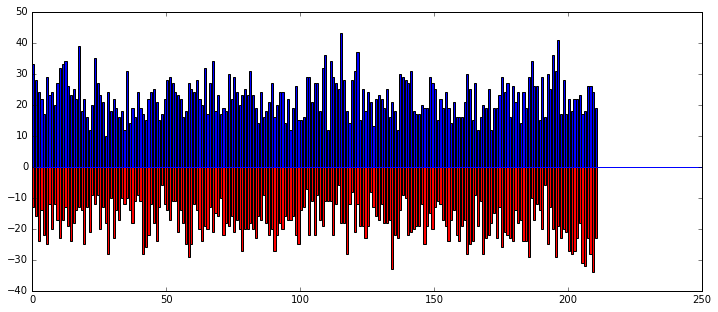

In [43]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pospage)),pospage)
plt.bar(range(len(negpage)), negpage, color='r')

In [44]:
pagesent = map(int,pagesent)

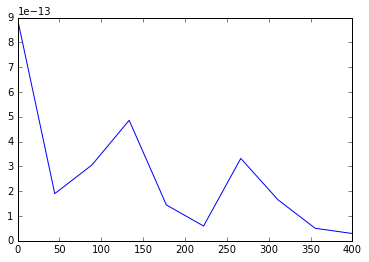

In [51]:
import scipy.fftpack

# Number of samplepoints
N = 20
# sample spacing
T = 1.0 / 800.0
x = np.asarray(pagesent)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N/2]))
plt.show()

In [46]:
woman = [u'she',u'her',u'girl']
womancount = []
for i in chunker(sleepwordsorig,250):
    womantmp = 0
    for word in i:
        if word in woman:
            womantmp+=1
    womancount.append(womantmp)

<Container object of 275 artists>

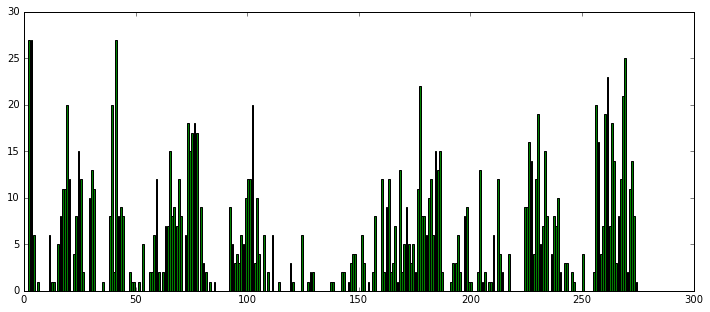

In [47]:
plt.figure(figsize=(12,5))
plt.bar(range(len(womancount)),womancount,color='g')

In [65]:
guncount = []
gun = ['gun','guns']
for i in chunker(sleepwordsorig,250):
    guntmp = 0
    for word in i:
        if word in gun:
            guntmp+=1
    guncount.append(guntmp)

In [66]:
guncount

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 3,
 2,
 4,
 2,
 3,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 4,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 3,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<Container object of 275 artists>

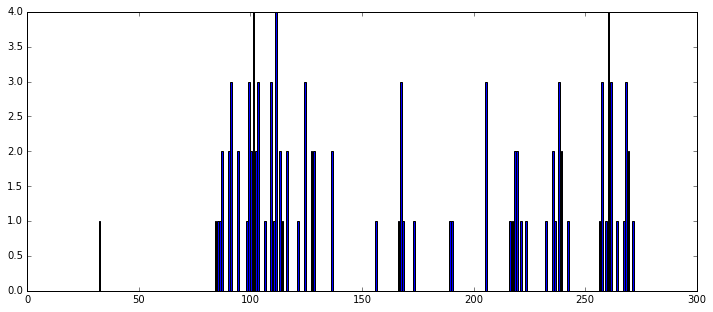

In [67]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(guncount)),guncount)